In [3]:
import gmplot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

In [4]:
# read dataset, selected three successive days from open data in July, 2017. 
# This data set is pre-cleaned. 
db= pd.read_csv('C:/Users/xuliu/Dropbox/OD data/Taxi/Taxi_data_Wed_July.csv')
db.PICKUPDATETIME_TR=pd.to_datetime(db.PICKUPDATETIME_TR)
db.set_index('PICKUPDATETIME_TR', inplace=True)

In [5]:
# setting index_time range, per hour
index_hr=pd.date_range(start='2017-07-26 00:00:00', periods=24, freq='H')

In [ ]:
# generate hourly pickup and dropoff points onto the map
for i in range(23):
    pickup_lat=[]
    pickup_long=[]
    dropoff_lat=[]
    dropoff_long=[]
    
    # need to sort it to make the time slicing work
    # this can also be achieved via db.resample('H') or db.groupby(db.index.hour)
    tmp=db.sort_index().loc[index_hr[i]:index_hr[i+1]]
    
    # store pickup/dropoff latitude and longitude in list
    pickup_lat=tmp['PICKUP_BLOCK_LATITUDE']
    pickup_long=tmp['PICKUP_BLOCK_LONGITUDE']
    dropoff_lat=tmp['DROPOFF_BLOCK_LATITUDE']
    dropoff_long=tmp['DROPOFF_BLOCK_LONGITUDE']
    
    # Get the washington DC map zoom level 11 as the base
    gmap = gmplot.GoogleMapPlotter(38.889931, -77.009003, 11)
    
    # lay on top pick-up points, black dots
    gmap.scatter(pickup_lat,pickup_long, '#3B0B39', size=25, marker=False)
    
    # lay on top dropoff points, red dots
    gmap.scatter(dropoff_lat,dropoff_long, '#FF0000', size=25, marker=False)
    
    # generate files of hourly pickup-dropoff and index it in the file name
    gmap.draw('Wed Hourly pickup dropoff map hour ' + str(i) + ".html")

# Display peak hour demand from one google map 

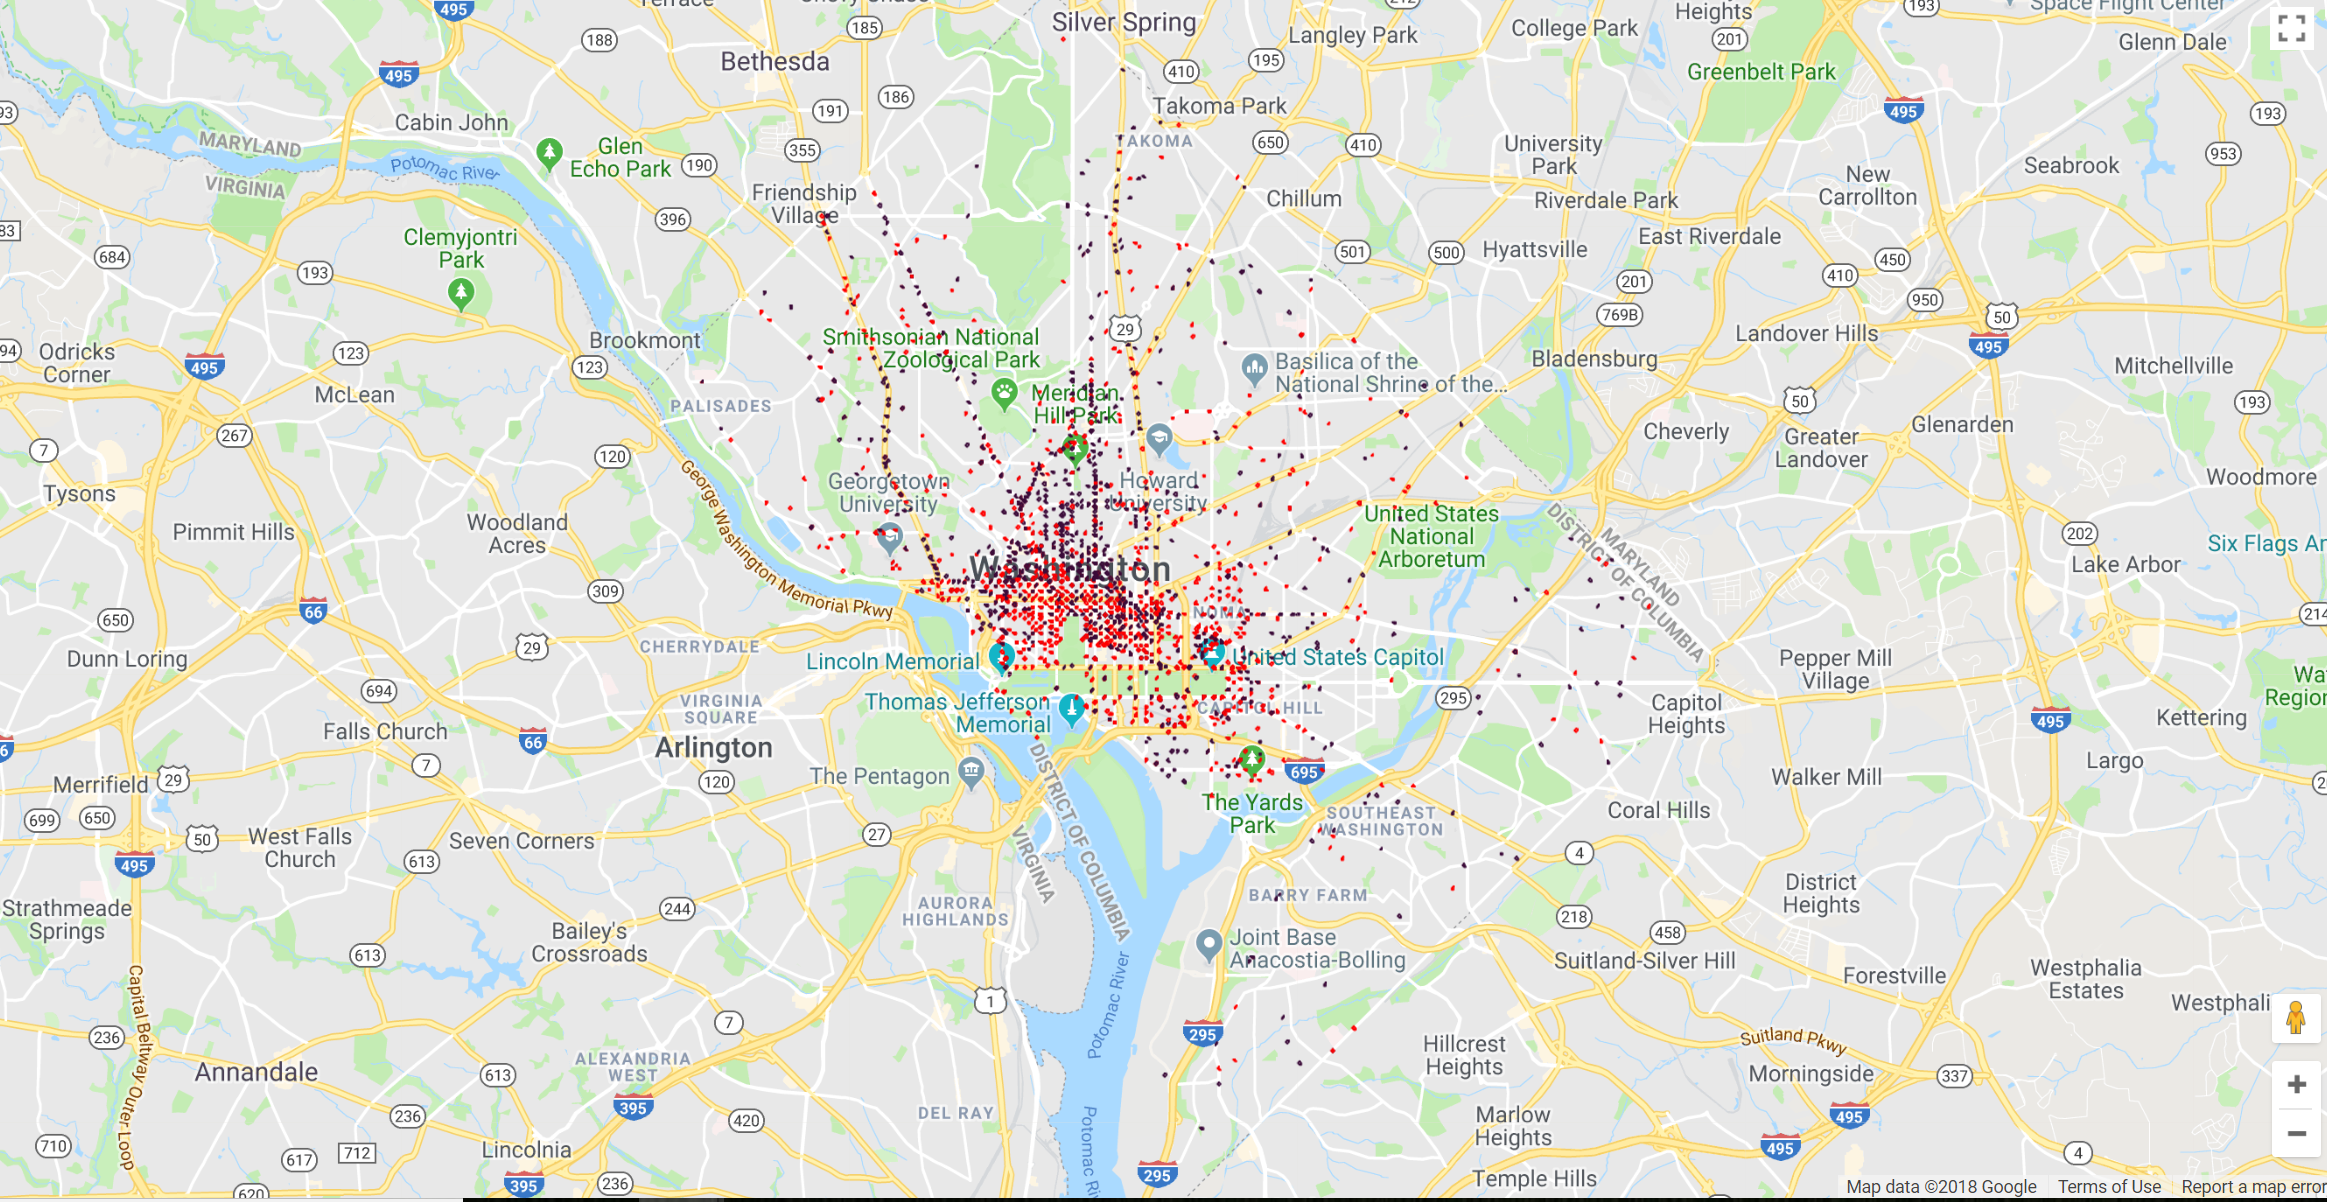

In [1]:
from IPython.display import Image
Image(filename='C:/Users/xuliu/Dropbox/OD data/Taxi/maping pickup and dropoff points to the map/Plot-1.png') 